 ## **BIBLIOTECAS**

In [ ]:
!pip install investpy

In [ ]:
import investpy as inv

In [ ]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [ ]:
import plotly.graph_objects as go

##**Curva de Juros**

In [ ]:
bonds_br = inv.get_bonds_list('brazil')

In [ ]:
bonds_br

In [ ]:
 bonds_overview  = inv.get_bonds_overview('brazil')

In [ ]:
bonds_overview

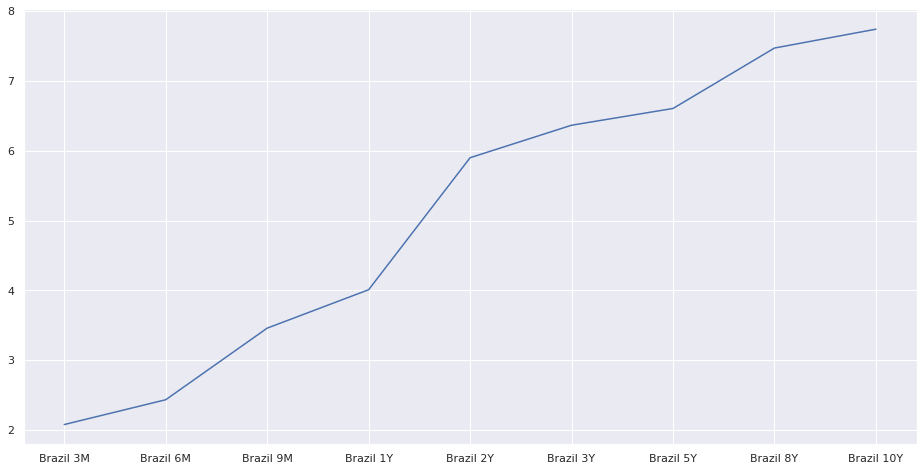

In [ ]:
plt.plot(bonds_br, bonds_overview['last_close']);

#### Título de 1 ano de vencimento

In [ ]:
data_inicio = '01/01/2010'
data_fim = '19/02/2021'
 
um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2021-02-11,3.930,3.930,3.930,3.930
2021-02-12,3.900,3.965,3.900,3.965
2021-02-17,3.940,4.010,3.940,3.965


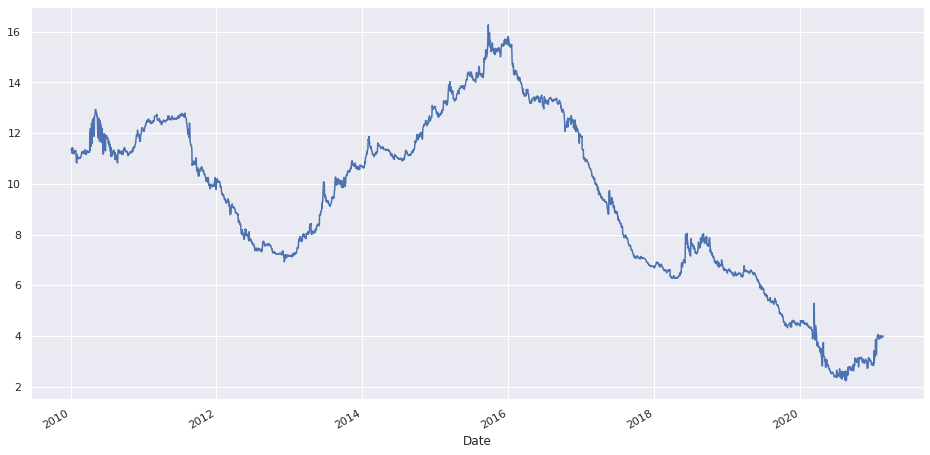

In [ ]:
um_ano['Close'].plot();

Comparando Juros

In [ ]:
data_inicio = '01/01/2010'
data_fim = '19/02/2021'
bonds = pd.DataFrame()
 
for prazo in bonds_br:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

In [ ]:
bonds.index = pd.to_datetime(bonds.index)

In [ ]:
bonds

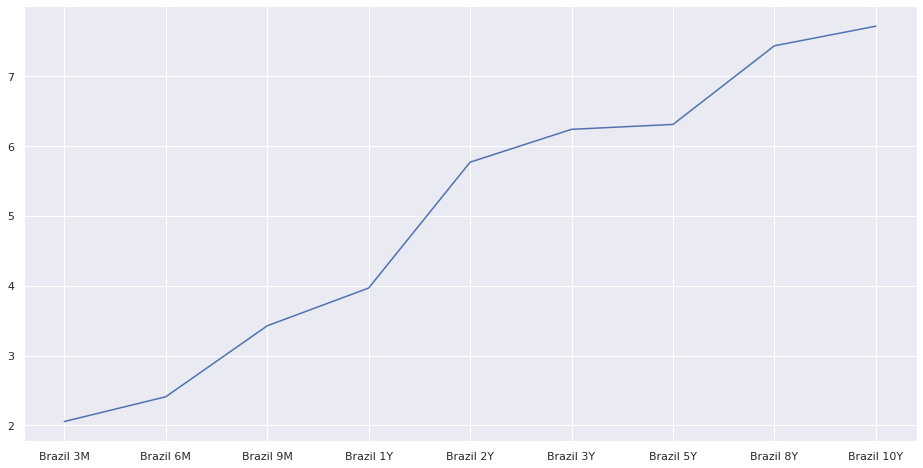

In [ ]:
plt.plot(bonds_br, bonds.loc['2021-02-12'].values)

In [ ]:
fig = go.Figure()
 
for i in bonds.index:
  fig.add_trace(go.Scatter(x=bonds_br, y=bonds.loc[i], mode='lines', name=str(i)))
 
fig.show()

####Juros no Fechamento do Mês

In [39]:
data_inicio = '01/01/2010'
data_fim = '12/02/2021'
bondsMensal = pd.DataFrame()
 
for prazo in bonds_br:
  bondsMensal[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval='Monthly')['Close']

In [40]:
fig = go.Figure()
 
for i in bondsMensal.index:
  fig.add_trace(
      go.Scatter(
          x=bonds_br, 
          y=bondsMensal.loc[i], 
          mode='lines', 
          name=str(i),
          visible=False
      )
  )
 
fig.data[0].visible = True
 
steps = []
 
for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i] = True
  steps.append(step)
 
sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês: "},
    pad={'t':50},
    steps=steps
)]
 
fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)
 
fig.show()

####Selic X Taxa de Juros em Títulos

In [41]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [42]:
selic_meta = consulta_bc(432)

In [43]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [45]:
fig = go.Figure()
 
for i in bonds_br:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))
 
fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))
 
fig.show()